Grafica PoS individual


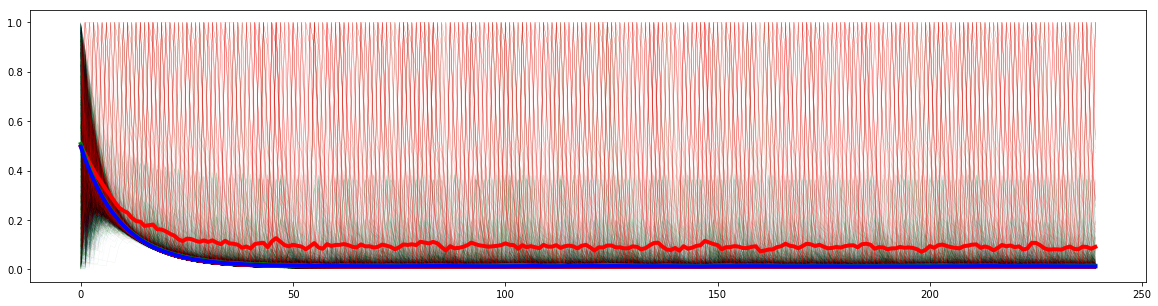

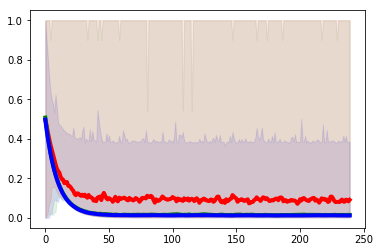

Grafica PoS media


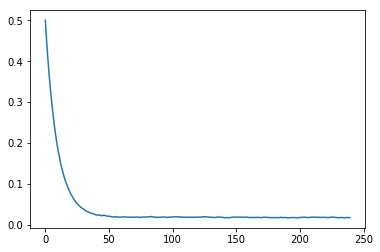

Grafica PoS media por grupos


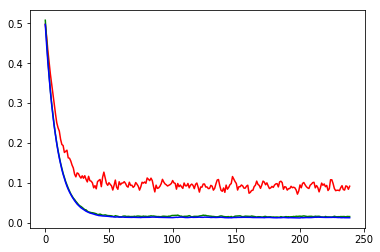

cantidad eventos criminales


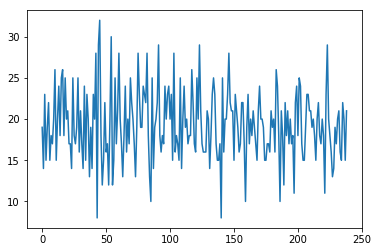

cantidad de victimas de al menos un crimen


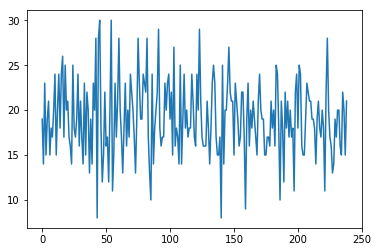

cantidad de pares de comunicacion


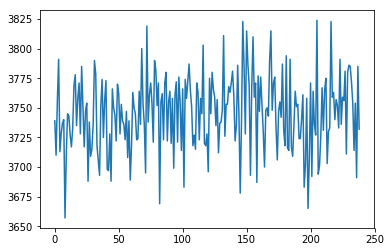

Porcentaje grupos con distinta media de crimen
[0.65 0.3  0.05]
Vector media de crimen por grupos
[0.         0.00096154 0.03269231]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.7
Resistencia a la inseguridad mu
0.4


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

n = 10000  # numero de personas
T = 240  # numero de periodos
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
g=np.zeros(n)#vector identificacion de grupo
psi = 0.9  # velocidad perdida de memoria
nu = 0.7  # Impacto de la inseguridad
mu = 0.4  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
m = 3  # cantidad de grupos con distinta tasa de crimen por periodo
lamda = np.array([0,0.05,1.7])  # tasas de crimen de los grupos
lamda[0]=0 #grupo inmune
q = np.array([0.65, 0.3, 0.05])  # porcentajes de los grupos en la poblacion total

#identificacion de cada sujeto con su respectiva media de crimen 
for i in range(int(n*q[0])):
    g[i]=lamda[0]
for i in range(int(n*q[0]),int(n*(q[0]+q[1]))):
    g[i]=lamda[1]
for i in range(int(n*(q[0]+q[1])),n):
               g[i]=lamda[2]

# calculo de la Pos en el intante t
# en t=0 es s
St[0] = s
robos=np.zeros(T)#cantidad de robos en cada periodo
numvictimas=np.zeros(T)# cantidad de victimas de al menos un crimen en cada periodo
parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
for t in range(1,T):
    # Al inicio de cada periodo aplicamos la perdida de memoria
    s = psi * s
    salto = []  # vector en el cual esta la gente con la que ya hubo comunicacion
    victimas=[]#victimas de al menos 1 crimen
    for k in range(n):
        # numero de crimenes sufridos por la persona k 
        X = np.random.poisson(g[k])
        # posicion hubo crimen o no
        I = 0
        if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
            I = 1
            robos[t]=robos[t]+X
            numvictimas[t]=numvictimas[t]+1
            victimas.append(k)
        # efecto del crimen en la percepcion de k para el siguiente periodo
        s[k] = I + (1 - I) * s[k]
        

        # si k ya se comunico con alguien o fue victima del crimen se continua con la siguiente persona
        if k in salto or k in victimas:
            continue
        if len(salto)+len(victimas)==len(s)-1:
            continue
        # Flag para modelar interacción social
        intSoc = bool(random.getrandbits(1))  # aleatoriamente escoge verdadero o falso
        if intSoc == True:
            # seleccionamos con quien se da la comunicacion
            j = np.random.randint(0, n)
            while j == k or j in salto or j in victimas:
                j = np.random.randint(0, n)
            s[k] = s[k] - mu * (s[k] - s[j])
            s[j] = s[j] - nu * (s[j] - s[k])
            # añadimos a la lista de los que ya se comunicaron a las personas k y j
            salto.append(j)
            salto.append(k)
    parescom[t]=len(salto)/2
    St[t] = s
%matplotlib inline 
plt.figure(figsize=(20,5))
print("Grafica PoS individual")
plt.plot(St[:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],'green',linewidth=0.3,alpha=0.1)
plt.plot(St[:,range(int(n*q[0]))],'blue',linewidth=0.3,alpha=0.01)
plt.plot(St[:,range(int(n*q[0]+n*q[1]),n)],'red',linewidth=0.3,alpha=0.1)
plt.plot(np.mean(St[:,range(int(n*q[0]+n*q[1]),n)],axis=1),'red',linewidth=4)
plt.plot(np.mean(St[:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'green',linewidth=4)
plt.plot(np.mean(St[:,range(int(n*q[0]))],axis=1),'blue',linewidth=4)
plt.show()
#maximo/minimo
x=np.arange(T)
minimo1=np.zeros(T)
maximo1=np.zeros(T)
minimo2=np.zeros(T)
maximo2=np.zeros(T)
minimo3=np.zeros(T)
maximo3=np.zeros(T)
for t in range(T):
    minimo1[t]=min(St[t,range(int(n*q[0]))])
    maximo1[t]=max(St[t,range(int(n*q[0]))]) 
    minimo2[t]=min(St[t,range(int(n*q[0]),int(n*q[0]+n*q[1]))])
    maximo2[t]=max(St[t,range(int(n*q[0]),int(n*q[0]+n*q[1]))])
    minimo3[t]=min(St[t,range(int(n*q[0]+n*q[1]),n)])
    maximo3[t]=max(St[t,range(int(n*q[0]+n*q[1]),n)]) 
plt.fill_between(x,minimo1,maximo1,color='blue',alpha=0.1)
plt.fill_between(x,minimo2,maximo2,color='green',alpha=0.1)
plt.fill_between(x,minimo3,maximo3,color='red',alpha=0.1)
plt.plot(np.mean(St[:,range(int(n*q[0]+n*q[1]),n)],axis=1),'red',linewidth=4)
plt.plot(np.mean(St[:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'green',linewidth=4)
plt.plot(np.mean(St[:,range(int(n*q[0]))],axis=1),'blue',linewidth=4)
plt.show()

print("Grafica PoS media")
plt.plot(np.mean(St,axis=1))
plt.show()
print("Grafica PoS media por grupos")
plt.plot(np.mean(St[:,range(int(n*q[0]+n*q[1]),n)],axis=1),'red')
plt.plot(np.mean(St[:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'green')
plt.plot(np.mean(St[:,range(int(n*q[0]))],axis=1),'blue')
plt.show()


print("cantidad eventos criminales")
plt.plot(robos[1:])
plt.show()
print("cantidad de victimas de al menos un crimen")
plt.plot(numvictimas[1:])
plt.show()
print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)


In [21]:
#prueba que el resultado es distinto cuando habla con mas de una persona con respecto al orden
s=np.random.rand(4)
a=s[0]
print(s)
print("-----------------------")
for i in range(3):
    s[0]=s[0]-nu*(s[0]-s[i+1])
    print(s)
s[0]=a
print("-----------------")
for i in range(3):
    s[0]=s[0]-nu*(s[0]-s[3-i])
    print(s)
       

[0.30383024 0.22192023 0.31636864 0.05061226]
-----------------------
[0.23011123 0.22192023 0.31636864 0.05061226]
[0.3077429  0.22192023 0.31636864 0.05061226]
[0.07632532 0.22192023 0.31636864 0.05061226]
-----------------
[0.07593406 0.22192023 0.31636864 0.05061226]
[0.29232518 0.22192023 0.31636864 0.05061226]
[0.22896072 0.22192023 0.31636864 0.05061226]


In [26]:
A=np.random.poisson(3,100)
print(A)
x=A.mean()
print(x)
A=np.random.poisson(x,100)
print(A)
x=A.mean()
print(x)
A=np.random.poisson(x,100)
print(A)
x=A.mean()
print(x)
A=np.random.poisson(x,100)
print(A)
x=A.mean()
print(x)

[2 5 5 2 3 1 1 1 3 3 3 1 3 1 4 2 4 2 4 3 3 5 3 3 4 2 3 2 4 5 3 4 2 2 5 3 4
 7 3 3 3 5 6 1 7 2 4 3 6 2 4 5 1 5 4 6 3 2 1 4 3 2 4 3 3 3 4 2 2 5 2 1 4 2
 3 1 0 1 3 2 4 1 2 4 0 2 3 3 2 4 1 4 2 3 3 1 4 4 0 2]
2.96
[1 2 5 4 1 1 4 4 4 2 2 1 2 1 6 2 1 5 2 1 1 0 1 0 6 2 2 2 4 3 4 3 3 3 1 2 2
 1 1 2 4 1 3 1 5 1 1 4 3 4 2 7 4 2 4 2 1 2 7 4 1 3 3 0 1 2 5 6 2 2 1 3 3 2
 3 4 4 4 5 3 2 2 1 2 4 2 1 3 3 3 1 3 3 7 1 3 5 2 2 2]
2.65
[2 2 2 3 0 3 4 3 1 2 1 2 2 3 1 3 2 0 3 2 3 1 1 3 5 4 2 5 5 1 3 6 1 6 0 3 3
 3 3 1 1 3 2 4 6 3 6 3 6 2 3 3 3 2 5 3 6 6 2 1 2 2 3 2 2 4 0 4 3 1 3 2 3 2
 1 4 2 4 2 1 2 5 3 2 2 2 2 1 4 1 3 4 3 4 1 3 7 3 4 1]
2.74
[0 6 1 2 7 4 3 3 2 1 2 4 5 3 4 1 0 3 3 7 1 3 6 5 1 3 4 1 1 2 3 9 2 1 1 2 6
 2 5 5 2 2 3 2 3 1 1 1 3 4 2 4 3 3 2 2 1 2 3 3 7 3 2 2 4 1 3 1 6 3 5 2 4 2
 3 4 2 3 2 2 4 1 4 3 2 1 3 0 3 5 2 0 1 3 1 4 1 3 1 2]
2.76
